## Introduction

Within the world of data science, Keras's deep learning applications have found uses across a multitude of domains from finance and business, to even healthcare and sports. By introducing these complex pattern recognition algorithms, data scientists have been able to find ways to solve many specific problems that were previously unreasonable to achieve with computers and code.  In this example walkthrough, we are going to discuss a serious yet powerful application, to use deep-learning and `Image Classification`, to predict if an individuals MRI brain scan, contains signs of Cancer in the form of a tumor.

Obviously, hospitals and research facilities can utilize the fast speed and ease of these models without meticulously sorting through every image. However, this application requires extreme precautions and ensures that our model is highly accurate, with close monitoring of any negative predictions to avoid false positives. Even in this scenario, a model can help flag individuals at risk or with small tumors before a doctor might, and even detect signs common among other cancer patients that may not be noticed by humans.

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Directories
train_dir = '/Users/rileysvensson/Desktop/GSB 545 - Advanced Machine Learning/archive (7)/Training'
test_dir = '/Users/rileysvensson/Desktop/GSB 545 - Advanced Machine Learning/archive (7)/Testing'


# Function to remove margins and resize images
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        image = image[y:y+h, x:x+w]
    image = cv2.resize(image, (150, 150))
    return image

# Custom preprocessing function for ImageDataGenerator
def custom_preprocess(image):
    image = np.array(image)
    image = preprocess_image(image)
    return image

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Visualize Training Images 

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to display images
def display_images(generator, num_images):
    images, labels = next(generator)
    images = images[:num_images]
    labels = labels[:num_images]
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(CLASS_NAMES[np.argmax(label)])
        ax.axis('off')
    plt.show()

# Display 5 images from the training set
display_images(train_generator, 5)


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/thresh.cpp:1559: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 5 (CV_32FC1)


In [7]:
from tensorflow.keras import layers, models

# Model building
model = models.Sequential([
    layers.InputLayer(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes for the 4 tumor types
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,943,812 (26.49 MB)

 Trainable params: 6,943,812 (26.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.4444 - loss: 1.1704 - val_accuracy: 0.6915 - val_loss: 0.9589
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.7089 - loss: 0.6892 - val_accuracy: 0.6862 - val_loss: 0.8494
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.7864 - loss: 0.5406 - val_accuracy: 0.7301 - val_loss: 0.7067
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.8082 - loss: 0.4904 - val_accuracy: 0.7660 - val_loss: 0.6582
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.8518 - loss: 0.3871 - val_accuracy: 0.7835 - val_loss: 0.6039
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.8799 - loss: 0.3305 - val_accuracy: 0.8054 - val_loss: 0.5222
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.8929 - loss: 0.2837 - val_accuracy: 0.8107 - val_loss: 0.5526
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.8988 - loss: 0

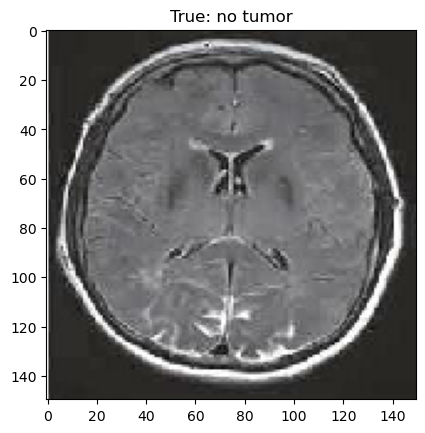

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
This image is 0.00 percent glioma
This image is 0.00 percent meningioma
This image is 100.00 percent no tumor
This image is 0.00 percent pituitary
Predicted: no tumor


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming class names are as follows:
CLASS_NAMES = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Get one example from the test set
for image_batch, label_batch in test_generator:
    image = image_batch[0]
    true_label = label_batch[0]
    
    # Display the image
    plt.imshow(image)
    plt.title(f"True: {CLASS_NAMES[np.argmax(true_label)]}")
    plt.show()
    
    # Make a prediction
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    scores = {name: score for name, score in zip(CLASS_NAMES, prediction)}
    
    # Print the prediction scores
    for name, score in scores.items():
        print(f"This image is {score * 100:.2f} percent {name}")
    
    # Print the predicted label
    predicted_label = CLASS_NAMES[np.argmax(prediction)]
    print(f"Predicted: {predicted_label}")
    
    # Break after one example
    break


Sources: 

https://keras.io/examples/vision/xray_classification_with_tpus/

https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data

In [ ]:
from tensorflow.keras import layers, models

# Model building
model = models.Sequential([
    layers.InputLayer(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes for the 4 tumor types
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training , try 30 epochs
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,943,812 (26.49 MB)

 Trainable params: 6,943,812 (26.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.4342 - loss: 1.1433 - val_accuracy: 0.6512 - val_loss: 0.9104
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.7211 - loss: 0.6512 - val_accuracy: 0.7248 - val_loss: 0.7824
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 240ms/step - accuracy: 0.7788 - loss: 0.5690 - val_accuracy: 0.7134 - val_loss: 0.8432
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 242ms/step - accuracy: 0.8077 - loss: 0.4777 - val_accuracy: 0.7704 - val_loss: 0.6112
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.8556 - loss: 0.3752 - val_accuracy: 0.7756 - val_loss: 0.6020
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.8876 - loss: 0.3148 - val_accuracy: 0.7923 - val_loss: 0.5772
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.8953 - loss: 0.2729 - val_accuracy: 0.8151 - val_loss: 0.5008
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.8907 - loss: 0